In [97]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd

# Enable eager execution
tf.config.run_functions_eagerly(True)

In [98]:
# Define paths with absolute paths
import os
current_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))
sample_image_path = os.path.join(current_dir, "dataset", "sample_00001373_053.png")
model_path = os.path.join(current_dir, "artifacts", "final_model.keras")
all_labels = ['Infiltration', 'Effusion', 'Atelectasis', 'Nodule', 'Mass', 'Pneumothorax', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly', 'Emphysema', 'Edema', 'Fibrosis', 'Pneumonia', 'Hernia']
print(f"Does model exist? {os.path.exists(model_path)}")
print(f"Does Sample image exist? {os.path.exists(sample_image_path)}")

Does model exist? True
Does Sample image exist? True


In [99]:
data_file_path = os.path.join(current_dir, "dataset", "Data_Entry_2017_v2020.csv")
data_df = pd.read_csv(data_file_path)
actual_result = data_df[data_df["Image Index"]=='00001373_053.png']["Finding Labels"].values[0]

In [109]:
# Load and preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

try:
    # Load the model
    model = load_model(model_path, compile=False)
    print("Model loaded successfully!")
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Preprocess the image
    processed_image = preprocess_image(sample_image_path)
    print("Image preprocessed successfully!")
    
    # Make prediction
    prediction = list(model.predict(processed_image, verbose=0))[0]
    prediction = [float(f"{v:.2f}") for v in prediction]

    confidence = {key: value*100 for key, value in zip(all_labels, prediction) if value>0.2}
    print(f"Confidence: {confidence}")
    
except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("fails.")

Model loaded successfully!
Image preprocessed successfully!
Confidence: {'Infiltration': 42.0, 'Effusion': 37.0, 'Atelectasis': 23.0}


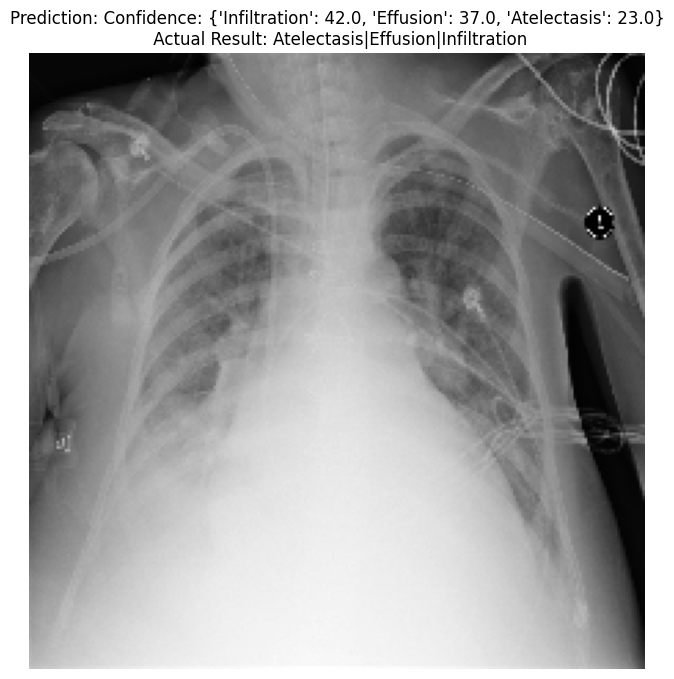

In [101]:
# Display the image with prediction
plt.figure(figsize=(8, 8))
img = load_img(sample_image_path, target_size=(224, 224), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: Confidence: {confidence}\n Actual Result: {actual_result}")
plt.axis('off')
plt.show()